# Exploration des mots

## Preprocessing

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [106]:
words_meta_filename = "../data/ascii/words.txt"
BASE_IMG_PATH = '../data/words'
columns= ['word_id', 'seg_res', 'gray_level', 'x', 'y', 'w', 'h', 'tag', 'transcription']

def parse_my_file(filename):
    with open(filename) as f:
        for line in f:
            if line.startswith('#'):
                continue
            yield line.strip().split(' ',len(columns) - 1)

df = pd.DataFrame(parse_my_file(words_meta_filename), columns=columns)
df.head()

,word_id,seg_res,gray_level,x,y,w,h,tag,transcription
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115320 entries, 0 to 115319
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   word_id        115320 non-null  object
 1   seg_res        115320 non-null  object
 2   gray_level     115320 non-null  object
 3   x              115320 non-null  object
 4   y              115320 non-null  object
 5   w              115320 non-null  object
 6   h              115320 non-null  object
 7   tag            115320 non-null  object
 8   transcription  115320 non-null  object
dtypes: object(9)
memory usage: 7.9+ MB


In [123]:
df['seg_res'].value_counts()

ok     96456
err    18864
Name: seg_res, dtype: int64

In [124]:

df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df['w'] = df['w'].astype(int)
df['h'] = df['h'].astype(int)
df['seg_res'].replace(['ok', 'err'], [1, 0], inplace=True) 
df['gray_level'] = df['gray_level'].astype(int)


In [126]:
df['seg_res'].value_counts()

1    96456
0    18864
Name: seg_res, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115320 entries, 0 to 115319
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   word_id        115320 non-null  object
 1   seg_res        115320 non-null  int64 
 2   gray_level     115320 non-null  int64 
 3   x              115320 non-null  int64 
 4   y              115320 non-null  int64 
 5   w              115320 non-null  int64 
 6   h              115320 non-null  int64 
 7   tag            115320 non-null  object
 8   transcription  115320 non-null  object
dtypes: int64(6), object(3)
memory usage: 7.9+ MB


## Rendering

In [ ]:

def show_img(path):
    img = plt.imread(path)
    plt.figure(figsize = (20,10))
    plt.imshow(img)

def get_word_image_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    return BASE_IMG_PATH + '/' + path_parts[0] + '/' + "-".join(path_parts[0:2]) + '/' + word_id+ '.png'

def show_df_image_by_word_id(word_id):
    full_path = get_word_image_path_by_word_id(word_id)
    show_img(full_path)


def get_form_img_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    first_letter = path_parts[0][0].lower()
    if first_letter in ['a', 'b', 'c', 'd']:
        base_path = "../data/formsA-D/" 
    elif first_letter in ['e', 'f', 'g', 'h']:
        base_path = "../data/formsE-H/" 
    else:
        base_path = "../data/formsI-Z/" 
    return base_path + "-".join(path_parts[0:2]) + '.png'

def show_form_img_by_word_id(word_id):
    show_img(get_form_img_path_by_word_id(word_id))

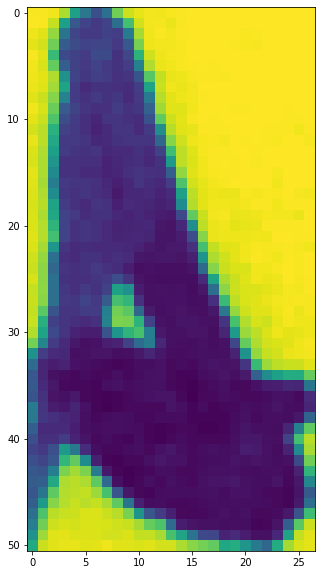

In [107]:
show_df_image_by_word_id(df.iloc[0].word_id)

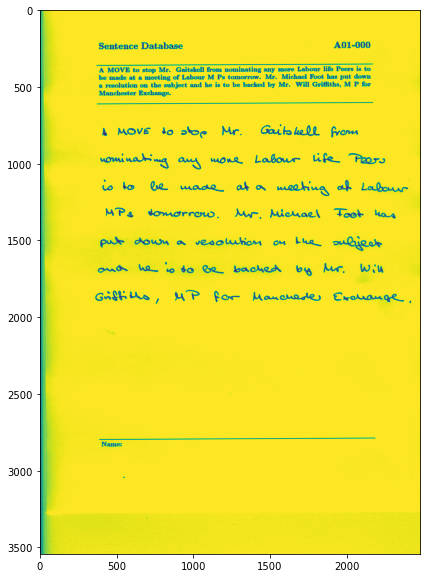

In [34]:
show_form_img_by_word_id(df.iloc[0].word_id)

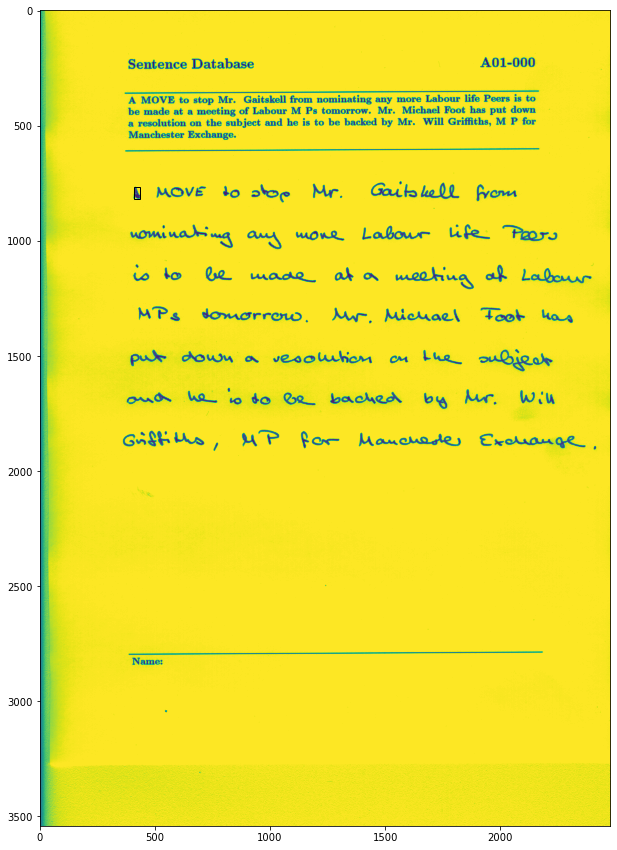

In [122]:
def plot_bounding_box(line):
    form_img_path = get_form_img_path_by_word_id(line.word_id)
    img = plt.imread(form_img_path)

    fig, ax = plt.subplots(figsize=(20,15))
    fig.figsize=(20,10)
    ax.imshow(img)

    ax.add_patch(
        patches.Rectangle(
            (line.x, line.y),
            line.w,
            line.h,
            fill=False      
        ) ) 
    plt.show()

plot_bounding_box(df.iloc[0])

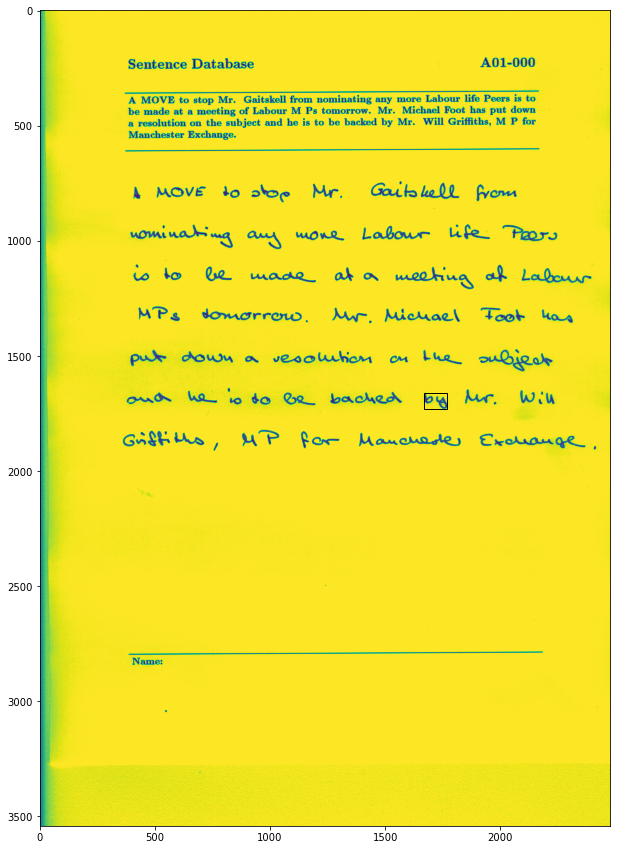

In [121]:
plot_bounding_box(df.iloc[42])

# TODO

- Make an img representation of the avg positioning of text using a mask
    - Make sure that all imgs have the same height and width
    - Calculate the coordinates in the standardized img
    - Show mask colorated img

- check influence of grayscale over the results ? 
- check influence of rotation on segmentation


## Répartition des lettres dans le corpus

In [110]:

corpus = "".join([trans.lower() for trans in df['transcription']])

def get_letter_frequency_dict(text):
    dic = {}
    for l in text:
        if l in dic:
            dic[l] += 1
        else:
            dic[l] = 1
    return dic

freq_dict = get_letter_frequency_dict(corpus)
print(freq_dict)


{'a': 37106, 'm': 11786, 'o': 33812, 'v': 4699, 'e': 57586, 't': 41624, 's': 28931, 'p': 8975, 'r': 28122, '.': 6224, 'g': 9314, 'i': 31900, 'k': 2982, 'l': 18674, 'f': 10495, 'n': 31738, 'y': 8491, 'b': 7657, 'u': 12392, 'd': 18521, ' ': 49, 'w': 9536, 'c': 12573, 'h': 26232, 'j': 604, ',': 5629, 'x': 793, '0': 431, '-': 1545, "'": 1987, '"': 1629, '1': 494, '9': 179, '5': 157, '8': 118, '3': 174, '#': 79, 'q': 386, '(': 203, '2': 209, ')': 200, '4': 118, ':': 165, '7': 64, ';': 204, '6': 121, 'z': 215, '?': 259, '*': 14, '!': 226, '/': 16, '&': 55, '+': 9}


In [111]:
keys = list(freq_dict.keys())
values = list(freq_dict.values())
sorted_indexes = np.argsort(keys)
labels = []
counts = []
for index in sorted_indexes:
    labels.append(keys[index])
    counts.append(values[index])

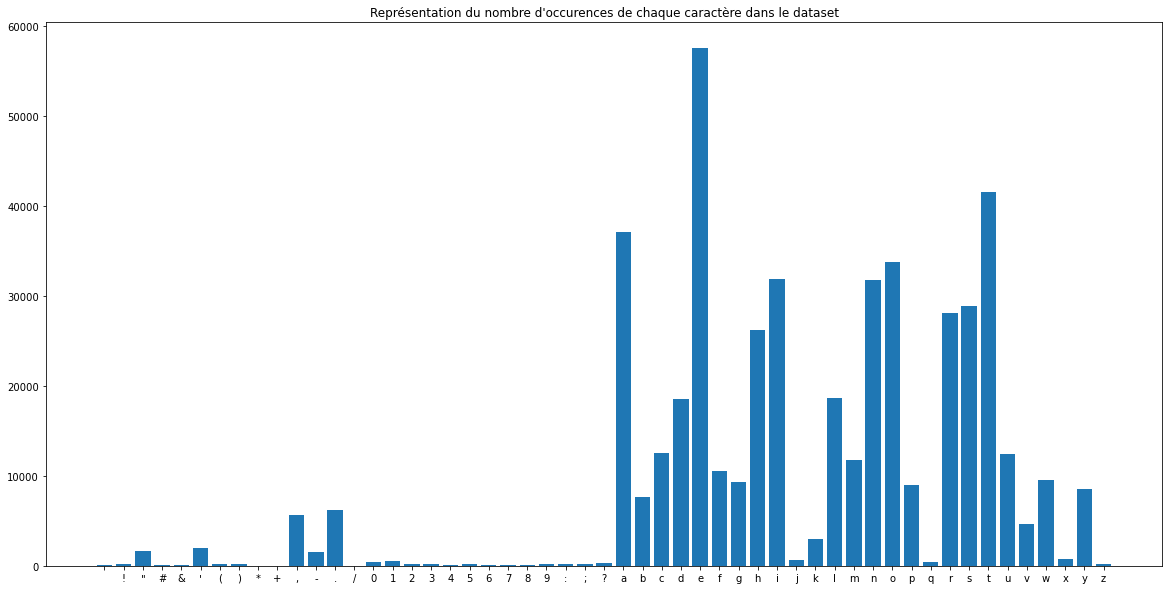

In [112]:
plt.figure(figsize=(20,10))
plt.title("Représentation du nombre d'occurences de chaque caractère dans le dataset")
plt.bar(labels, counts)
plt.show()

In [134]:
print("La lettre 'k' est représentée seulement", freq_dict['k'], "dans le corpus")
print("Tandis que la lettre 'e' est représentée", freq_dict['e'], "dans le corpus")

La lettre 'k' est représentée seulement 2982 dans le corpus
Tandis que la lettre 'e' est représentée 57586 dans le corpus


Nous pouvons observer une grosse disparité dans les représentations de chacune des lettres.
Les lettres 'j', 'k', 'q', 'x' et 'z' notamment sont très peu représentées. 

A l'inverse, les lettres 'e', 'a' et 't' sont très présentes. 



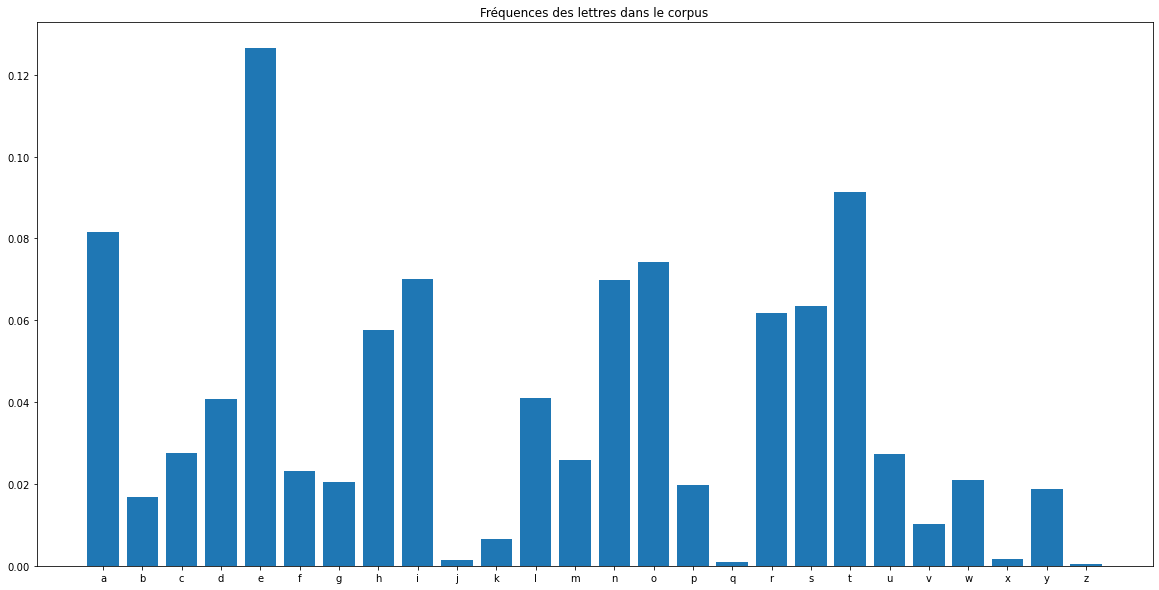

In [136]:
from functools import reduce

alphabet_start = labels.index('a')

alphabet_labels = labels[alphabet_start:]
alphabet_counts = counts[alphabet_start:]
total_alphabet_occurences = reduce(lambda a, b: a + b,  alphabet_counts)

plt.figure(figsize=(20,10))
plt.title("Fréquences des lettres dans le corpus")
plt.bar(alphabet_labels, [count / total_alphabet_occurences for count in alphabet_counts])
plt.show()

Cette distribution peut être mise en paralèlle avec la distribution des lettres dans la langue anglaise. 

En effet, notre objectif étant de créer une reconnaissance de caractères, plus notre modèle aura l'habtiude de traiter des lettres fréquentes correctement, meilleures seront nos chances de réussite, à defaut d'avoir un dataset plus conséquent.

Or, les fréquences des lettres anglaises semblent bien concordées avec la distribution de notre corpus. Le corpus est donc bien représentatif.

<img src="../imgs/english_letter_distribution.png" />

Source: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html

On peut par contre se demander comment réagirait notre modèle à une autre langue dont la répartition des lettres serait différente.

## Répartition des tags

## Position des boîtes

```
file n06-128.png
```

Output:
`n06-128.png: PNG image data, 2479 x 3542, 8-bit grayscale, non-interlaced`


In [129]:
print(df['x'].max())
print(df['y'].max())

2471
2792


word_id          a01-000u-00-00
seg_res                       1
gray_level                  154
x                           408
y                           768
w                            27
h                            51
tag                          AT
transcription                 A
Name: 0, dtype: object


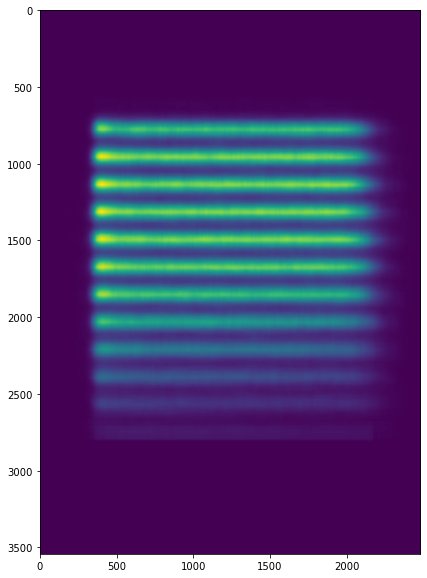

In [133]:
def show_text_position_over_dataset():
    arr = np.zeros((3542, 2479))
    for index, row in df.iterrows():
        x = row.x
        y = row.y
        arr[y][x] += 1
        for i in range(row.h):
            for j in range(row.w):
                arr[y + i][x + j] += 1

    plt.figure(figsize=(20,10))
    plt.imshow(arr);

# Need ten minutes to run
show_text_position_over_dataset()